## **Credit Score Classification**

#### I already cleaned the datasets train.csv and test.csv so I can omit some steps

In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Importing dataset
df = pd.read_csv('../Data_Engineering/train.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [9]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,265.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [20]:
#Checking target column 'Credit_Score'
df.Credit_Score.value_counts(normalize = True) * 100

Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

### Exploring the relation between our target column and the features

In [27]:
#I need this list to explore the relation
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

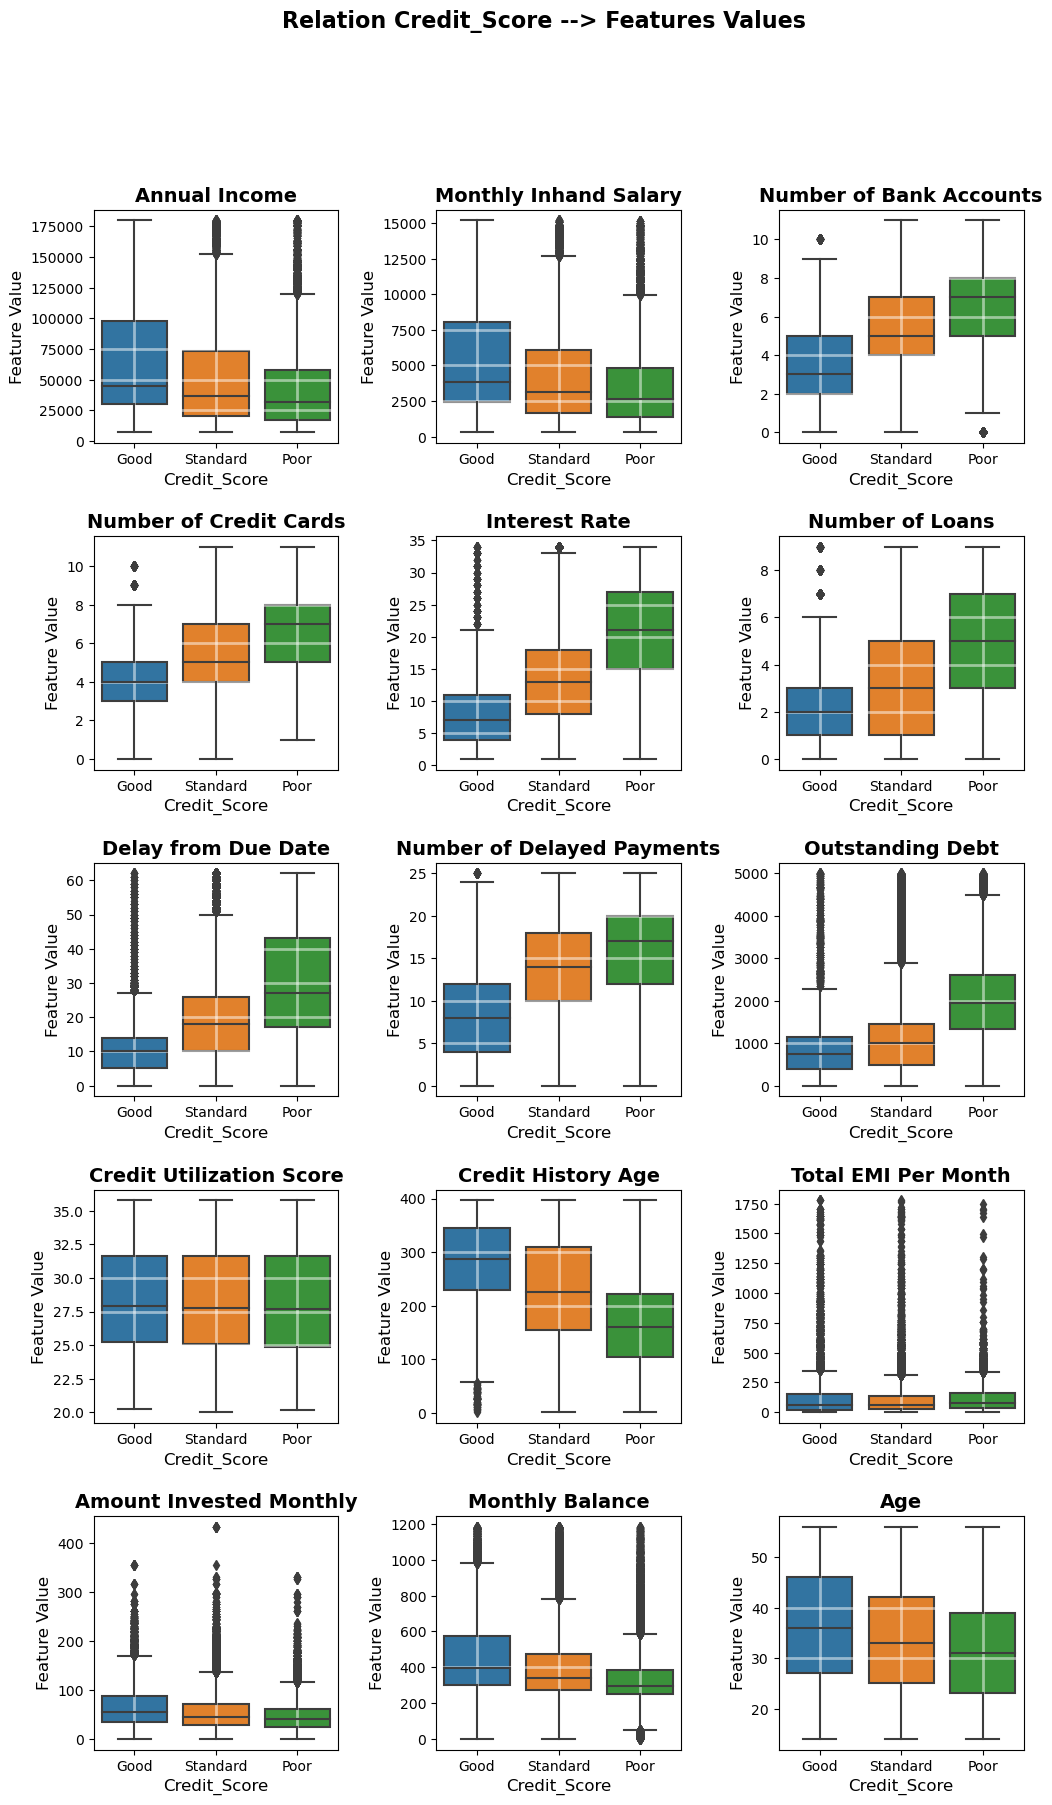

In [31]:
#Creating a figure and grid of subplots of 5x3
fig, ax = plt.subplots(5, 3, figsize = (12, 20))

#Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

#List of features and titles
features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 
            'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
            'Amount_invested_monthly', 'Monthly_Balance', 'Age']
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards', 
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']

#Plot multiple boxplots on the same axis
for i, feature in enumerate(features):
    sns.boxplot(x = 'Credit_Score', y = feature, data = df, ax = ax[i])
    ax[i].set_title(titles[i], fontsize = 14, fontweight = 'bold')
    ax[i].set_xlabel('Credit_Score', fontsize = 12)
    ax[i].set_ylabel('Feature Value', fontsize = 12)
    ax[i].grid(color = 'white', linestyle = '-', linewidth = 2, alpha = 0.5)

#Adjust spacing between subplots
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

#Add a main title
fig.suptitle('Relation Credit_Score --> Features Values', fontsize = 16, fontweight = 'bold')

#Show graphs
plt.show()

### From the graphs we can deduce the following:

1. The higher the anual income, the higher the credit score.
2. The higher monthly inhand salary, the better credit score
3. The optimal number of bank accounts is between 2 - 4. If it exceeds 5, it afeccts your credit score.
4. The optimal number of credit cards is between 3-5. If it exceeds 5, it affects your credit score.
5. 4-11% is the optimal rate value. Greater than 15% is not acceptable
6. Take 1-3 loans to have a good credit score. Having more than 3 loans will impact your credit score.
7. There is a 5-14 day delay margin to maintain a good credit score. More than 18 days has an impact on your credit score.
8. Having 4-12 late payments keeps you in a safe range. More than 12 compromises your credit score.
9. Having an outstanding debt between 390-1150\\$ keeps you in a safe range. Above 1338\\$ has a negative impact on your credit score.
10. The credit utilisation rate does not affect the credit score.
11. A longer credit history improves your credit score.
12. The number of EMIs paid per month does not affect the credit score
13. Monthly investment amount has minimal impact on credit score.
14. Having a high monthly account balance improves your credit score.
15. Credit score tends to improve with age.

### Credit Score Classification model
##### The Credit_Mix column is important for determining Credit_Score, as it provides information on types of credits and loans taken.
##### The column needs to be transformed as it is categorical and must be numerical in order to be used to train the machine learning model.

In [62]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [64]:
#Transforming
# Good = 2, Standard = 1, Bad = 0
df['Credit_Mix'] = df['Credit_Mix'].map({'Good':2, 'Standard':1, 'Bad':0})

In [68]:
#Checking
df.Credit_Mix.unique()

array([2, 1, 0], dtype=int64)

In [70]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

In [72]:
X = df[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]].values
y = df["Credit_Score"].values

In [74]:
#train --> 67%, test --> 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model = RandomForestClassifier(n_estimators = 300, class_weight = 'balanced')

In [111]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [113]:
#Using test data
prediction = model.predict(X_test)

In [115]:
#Importing metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [117]:
#Calculating metrics
class_report = classification_report(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

#Printing metrics
print('Classification Report:\n', class_report)
print('Confusion Matrix:\n', conf_matrix)
print(f'Accuracy Score: {accuracy:4f}')

Classification Report:
               precision    recall  f1-score   support

        Good       0.77      0.75      0.76      5866
        Poor       0.79      0.82      0.81      9633
    Standard       0.82      0.81      0.82     17501

    accuracy                           0.80     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.80      0.80      0.80     33000

Confusion Matrix:
 [[ 4410    23  1433]
 [   23  7934  1676]
 [ 1272  2049 14180]]
Accuracy Score: 0.803758


#####  Classifying customers according to their credit scores enables banks to promptly extend loans to individuals with strong creditworthiness